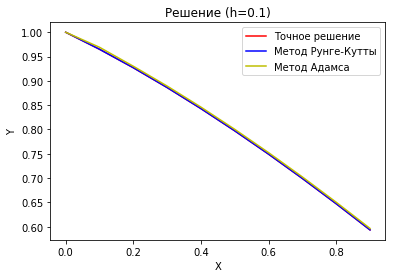

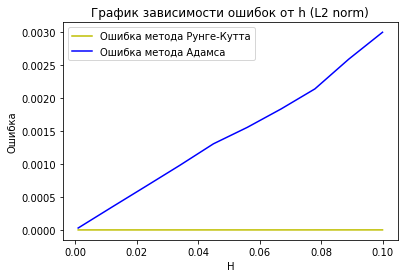

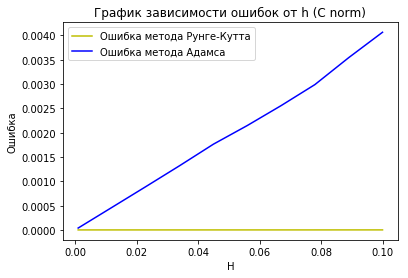

In [2]:
import matplotlib.pyplot as plt
import math, os
import numpy as np
import pandas as pd
%matplotlib inline

def error(y_true, y_pred):
    return [(el - el1) for el, el1 in zip(y_true, y_pred)]

def error_L2(y_true, y_pred, h):
    return np.sqrt(np.sum([np.power(el, 2) for el in error(y_true, y_pred)]) * h)

def uniform_error(y_true, y_pred):
    return np.max(np.fabs(error(y_true, y_pred)))

def get_X(x0, h):
    N = int(1/h)
    return [(x0 + i*h) for i in range(N)]


def runge_cutta_4(func, h, x0, y0):
    N = int(1/h)

    Y = [0 for i in range(N)]
    X = get_X(x0, h)
    k1 = [0 for i in range(N)]
    k2 = [0 for i in range(N)]
    k3 = [0 for i in range(N)]
    k4 = [0 for i in range(N)]

    for i in range(N):
        if (i == 0):
            Y[i] = y0
        else:
            Y[i] = Y[i-1] + (h/6) * (k1[i-1] + 2 * k2[i-1] + 2 * k3[i-1] + k4[i-1])

        k1[i] = func(X[i], Y[i])
        k2[i] = func(X[i] + h / 2, Y[i] + (h / 2) * k1[i])
        k3[i] = func(X[i] + h / 2, Y[i] + (h / 2) * k2[i])
        k4[i] = func(X[i] + h, Y[i] + h * k3[i])

    return Y

#інтерполяційний метод Адамса 4-го порядку
def adams_4(func, h, x0, y0):
    N = int(1/h)

    Y_add = runge_cutta_4(func, h, x0, y0)
    X = get_X(x0, h)
    Y = [0 for i in range(N)]
    func_meanings = [func(el, el1) for el, el1 in zip(X, Y_add)]

    for i in range(N):
        if (i == 0):
            Y[i] = y0
        else:
            Y[i] = Y[i-1] + (h/24) * (9 * func_meanings[i]
            + 19 * func_meanings[i-1] - 5 * func_meanings[i-2] + func_meanings[i-3])
    return Y


#x0 = 1, y0 = 1
#func = lambda x, y: -1 / (y*pow((1-pow(x, 2))/(1-pow(y, 2)), 0.5))
#y_real = lambda x: pow(1 - pow(math.acos(x), 2), 0.5)

#x0 = 0, y0=1
func = lambda x, y: (3*y - x - 4) / (3*x + 3)
y_real = lambda x: 1 - (x+1)*math.log(math.fabs(x+1)) / 3


X = get_X(0, 0.1)
answers = [y_real(i) for i in X]

H = np.linspace(0.001, 0.1, 10)
predictions_runge_cutta = [runge_cutta_4(func, h, 0, 1) for h in H]
errors_runge_cutta = error(answers, runge_cutta_4(func, 0.1, 0, 1))
errors_runge_cutta_h_L2 = [error_L2([y_real(i) for i in get_X(0, h)],
                               predictions_runge_cutta[i], h) for i, h in enumerate(H)]

errors_runge_cutta_h_uniform = [uniform_error([y_real(i) for i in get_X(0, h)],
                               predictions_runge_cutta[i]) for i, h in enumerate(H)]


predictions_adams = [adams_4(func, h, 0, 1) for h in H]
errors_adams = error(answers, adams_4(func, 0.1, 0, 1))
errors_adams_h_L2 = [error_L2([y_real(i) for i in get_X(0, h)],
                               predictions_adams[i], h) for i, h in enumerate(H)]
errors_adams_h_uniform = [uniform_error([y_real(i) for i in get_X(0, h)],
                               predictions_adams[i]) for i, h in enumerate(H)]

frame = pd.DataFrame(columns=['Y_real', 'Runge_Cutt', 'Adams', 'Errors_Runge_Cutta', 'Errors_Adams'])
frame['Y_real'] = pd.Series(answers)
frame['Runge_Cutt'] = pd.Series(runge_cutta_4(func, 0.1, 0, 1))
frame['Adams'] = pd.Series(adams_4(func, 0.1, 0, 1))
frame['Errors_Runge_Cutta'] = pd.Series(errors_runge_cutta)
frame['Errors_Adams'] = pd.Series(errors_adams)
frame.to_csv('results.csv', index = False)


titles = ['Решение (h=0.1)', 'График зависимости ошибок от h (L2 norm)',
          'График зависимости ошибок от h (C norm)']
legends = [['Точное решение', 'Метод Рунге-Кутты', 'Метод Адамса'],
           ['Ошибка метода Рунге-Кутта', 'Ошибка метода Адамса'],
           ['Ошибка метода Рунге-Кутта', 'Ошибка метода Адамса']]

values_to_plot = [(X, answers, 'r', X, runge_cutta_4(func, 0.1, 0, 1), 'b', X,
                   adams_4(func, 0.1, 0, 1), 'y'),
                  (H, errors_runge_cutta_h_L2, 'y', H, errors_adams_h_L2, 'b'),
                  (H, errors_runge_cutta_h_uniform, 'y', H, errors_adams_h_uniform, 'b')]

labels = [('X', 'Y'), ('H', 'Ошибка'), ('H', 'Ошибка')]



for i in range(3):
    plt.title(titles[i])
    if i == 0:
        plt.plot(values_to_plot[i][0], values_to_plot[i][1], values_to_plot[i][2],
                 values_to_plot[i][3], values_to_plot[i][4], values_to_plot[i][5],
                 values_to_plot[i][6], values_to_plot[i][7], values_to_plot[i][8])
    else:
        plt.plot(values_to_plot[i][0], values_to_plot[i][1], values_to_plot[i][2],
                 values_to_plot[i][3], values_to_plot[i][4], values_to_plot[i][5])
    plt.legend(legends[i])
    plt.xlabel(labels[i][0])
    plt.ylabel(labels[i][1])
    plt.savefig(os.getcwd() + '/%s.png' % titles[i])
    plt.show()
